# data fusion | error on using X & Y !!!!!|

<img src="Griglia-Campionamento.png" alt="Griglia di Campionamento" style="width:500px;float:left;" >

Import NSRDGC saved from within MatLab [put this code at the end of this document]

In [16]:
pwd
cd /home/giuliano/work/Projects/terrafuochi
pwd

ans =
    '/home/giuliano/work/Projects/terrafuochi'
ans =
    '/home/giuliano/work/Projects/terrafuochi'


In [17]:
NSRDGC = load('NSRDGC.txt');

In [19]:
size(NSRDGC)
head(NSRDGC)

ans =
        2410           3
                  424291.3                   4533034                0.34979124
                  424291.3                   4533039                0.85086835
                  424291.3                   4533044                0.88123231
                  424291.3                   4533049                0.73044703


In [7]:
setwd('/home/giuliano/work/Projects/terrafuochi')
getwd()
dir(pattern='*.txt')

[1] "/home/giuliano/work/Projects/terrafuochi"

[1] "L1_gcs.txt"                        "L1_ok.txt"                        
 [3] "L2_ok.txt"                         "L3_ok.txt"                        
 [5] "NOTES.txt"                         "NSRDGC.txt"                       
 [7] "ok_L1_raw.txt"                     "ok_L2_raw.txt"                    
 [9] "ok_L3_raw.txt"                     "ok.txt"                           
[11] "SumOfRelativeDifferences.txt"      "vgm_exp_log_L1_rd__Chrome-xrf.txt"
[13] "vgm_exp_log_L1_rd__Zinc-xrf.txt"   "vgm_exp_log_L2_rd__Chrome-xrf.txt"
[15] "vgm_exp_log_L2_rd__Zinc-xrf.txt"   "vgm_exp_log_L3_rd__Chrome-xrf.txt"
[17] "vgm_exp_log_L3_rd__Zinc-xrf.txt"   "vgm_fit_log_L1_rd__Chrome-xrf.txt"
[19] "vgm_fit_log_L1_rd__Zinc-xrf.txt"   "vgm_fit_log_L2_rd__Chrome-xrf.txt"
[21] "vgm_fit_log_L2_rd__Zinc-xrf.txt"   "vgm_fit_log_L3_rd__Chrome-xrf.txt"
[23] "vgm_fit_log_L3_rd__Zinc-xrf.txt"   "xrf_1d_ChEl.txt"                  
[25] "xrf_1d_chrome.txt"                 "xrf_1d_zinc.txt"                  
[27] "xrf_grid.txt"

In [32]:
#%get NSRDGC --from matlab
#NSRDGC = read.table('NSRDGC.txt',sep=',',header=TRUE)
NSRDGC = read.table('NSRDGC_rescaled.txt',sep=',',header=TRUE)
summary(NSRDGC)
head(NSRDGC)

       X                Y           NSRDGC_rescaled 
 Min.   :424291   Min.   :4533019   Min.   :0.1357  
 1st Qu.:424346   1st Qu.:4533109   1st Qu.:0.3809  
 Median :424391   Median :4533184   Median :0.5091  
 Mean   :424394   Mean   :4533185   Mean   :0.5827  
 3rd Qu.:424441   3rd Qu.:4533259   3rd Qu.:0.7109  
 Max.   :424516   Max.   :4533374   Max.   :1.4830  
                                    NA's   :374     

X,Y,NSRDGC_rescaled
424291.3,4533034,0.349791
424291.3,4533039,0.850868
424291.3,4533044,0.881232
424291.3,4533049,0.730447
424291.3,4533054,0.602340
424291.3,4533059,0.535449


In [ ]:
require(sp)
require(gstat)
require(raster)
require(rgdal)

In [1]:
version

Frontend communicator is broken. Please restart jupyter server


               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          4.4                         
year           2018                        
month          03                          
day            15                          
svn rev        74408                       
language       R                           
version.string R version 3.4.4 (2018-03-15)
nickname       Someone to Lean On          

Frontend communicator is broken. Please restart jupyter server


In [33]:
coordinates(NSRDGC)=~X+Y
class(NSRDGC)
gridded(NSRDGC)=TRUE
class(NSRDGC)

[1] "SpatialPointsDataFrame"
attr(,"package")
[1] "sp"

[1] "SpatialPixelsDataFrame"
attr(,"package")
[1] "sp"

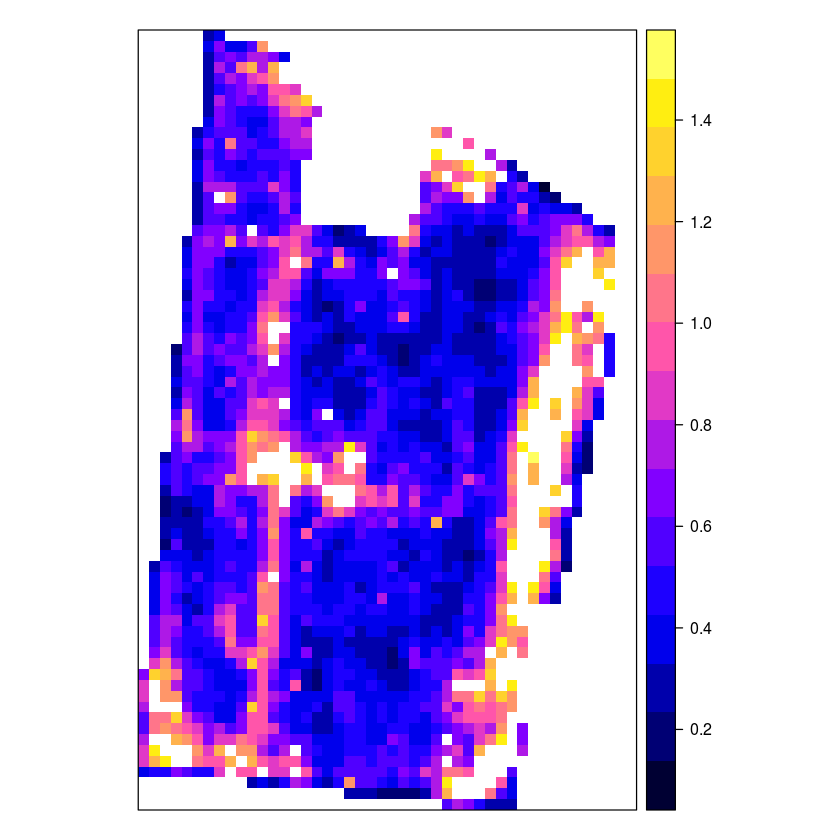

In [34]:
spplot(NSRDGC)

ERROR: Error in .requireRgdal(): package 'rgdal' is not available


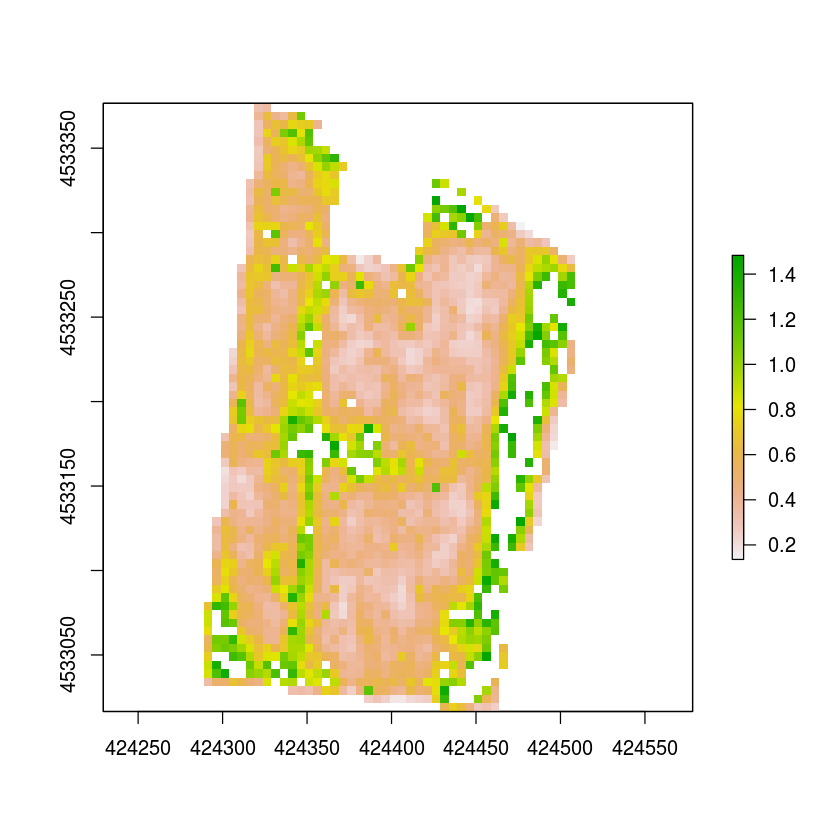

In [39]:
r = raster(NSRDGC)
plot(r)
writeRaster(r,"NSRDGC.tiff","GTiff")

## PARs

In [1]:
% _______ PARs __________________
CELLSIZE    = 5;%mt.
Lat         = [40.944940,40.947950];
Lon         = [14.100488,14.102664];
% to retireve the orthophoto:
LatE        = [40.9440,40.9490];
LonE        = [14.0990,14.1045];
% _______ PARs __________________

% DEM
Fdem = '/media/DATI/wg-pedology/db-backup/WEB_GIS_ZONAZIONE/dem_campa20m_geotiff/dem_campa.tif';
% ORTHOPHOTO
%Url_ortofoto = 'https://sit2.regione.campania.it/geoserver/RegioneCampania.Cartografia.Base.Raster/wms?';
Url_ortofoto = 'https://sit2.regione.campania.it/geoserver/RegioneCampania.WMS.Base/wms?';

% BBOX:
points = [410.667,555.999; 649.334,581.332; 729.334,226.668; ...
         688.667,198.001; 656,176.668; 628.667,161.334; 595.275,146.668; 570,136.001;
         546.667,122.668; 518,106.001; 487.333,95.334; 458,90.001];

## build the interpolation grid

In [2]:
proj = geotiffinfo(Fdem);
[x,y] = projfwd(proj,Lat,Lon);

In [3]:
% the y coordinate was inverted, below I set it properly by using an
% opposite y-gradient:
D = diff(points(:,2));
for ii = 2:size(points,1)
    points(ii,2) = points(ii-1,2) - D(ii-1);
end
% set the bottom-left corner at [0,0]:
xo = points(1,1);
yo = points(1,2);
points(:,1)= points(:,1)-xo;
points(:,2)= points(:,2)-yo;
% close the poligon:
points(end+1,:) = points(1,:);
% apply the scale factor to homogenise with the grid sampling scale:
sfactor = (x(2)-x(1)-12)/(points(2,1)-points(1,1));
points = sfactor*points;

In [4]:
% ORTHOPHOTO
ortofoto = wmsinfo(Url_ortofoto);
    [sg,Rsg] = wmsread(ortofoto.Layer(4),'Latlim',LatE,'Lonlim',LonE);
    % Display the ortho-image in a UTM projection.
    figure(1), clf
    axesm('utm', 'Zone', utmzone(LatE, LonE), ...
        'MapLatlimit', LatE, 'MapLonlimit', LonE, ...
        'Geoid', wgs84Ellipsoid)
    geoshow(sg,Rsg)
    axis off
    title({'\fontsize{14}\color{black}\bf San Giuseppiello',
           '\fontsize{12}\color{red}Orthophoto & grid sampling',
           '\fontsize{8}\color{gray}GLangella'})

Operation terminated by user during WMSCapabilities>setCRS (line 484)

In WMSCapabilities>setLayerProperties (line 434)
        Layer(k) = setCRS(Layer(k), namedLayer);       
In WMSCapabilities>setCapabilityProperties (line 359)
capabilities = setLayerProperties(capabilities, document);
In WMSCapabilities>setProperties (line 287)
capabilities = setCapabilityProperties(capabilities, document);
In WMSCapabilities (line 165)
                self = setProperties(self, document, serverURL);
In WebMapServer/issueWebReadGetCapabilitiesRequest (line 552)
            capabilities = WMSCapabilities(serverURL, response);
In WebMapServer/issueGetCapabilitiesRequest (line 504)
                capabilities = issueWebReadGetCapabilitiesRequest(h, version);
In WebMapServer/getCapabilities (line 238)
                capabilities = issueGetCapabilitiesRequest(h);
In wmsinfo>getDocument (line 326)
    capabilities = server.getCapabilities();
In wmsinfo (line 315)
capabilities = getDocument(server, timeo

the MATLAB function has been cancelled


In [5]:
% CONVERT:
xo = x(1);
yo = y(1);
x = x-x(1);
y = y-y(1);
% rotation:
angl    = 0;% -6;
rot_mat = @(angl) [cos(angl) -sin(angl); sin(angl) cos(angl)];
mat     = rot_mat(deg2rad(angl));

In [ ]:
% figure:
figure(1),% clf,
hold on
Xv = x(1)-CELLSIZE:CELLSIZE:x(2)+(diff(x)/4)+CELLSIZE;
Yh = y(1)-(diff(y)/6)-CELLSIZE:CELLSIZE:y(2)+CELLSIZE;
for ii = 1:length(Xv)
    XY = mat*[[Xv(ii),Xv(ii)];[min(Yh),max(Yh)]];
    line(xo+XY(1,:),yo+XY(2,:),'color',[.7,.7,.7])
end
for ii = 1:length(Yh)
    XY = mat*[[min(Xv),max(Xv)];[Yh(ii),Yh(ii)]];
    line(xo+XY(1,:),yo+XY(2,:),'color',[.7,.7,.7])
end
% add the polygon:
line(xo+points(:,1),yo+points(:,2),'color','k','LineWidth',2)
% plot the sampling points:
[Xs,Ys] = meshgrid(Xv(1:end-1)+20/2,Yh(1:end-1)+20/2);
XY = mat*[Xs(:),Ys(:)]';
% find sampling points inside (IN) or on the border of (ON) poligon:
[IN,ON] = inpolygon(XY(1,:),XY(2,:),points(:,1),points(:,2));
% plot IN points
scatter(xo+XY(1,IN),yo+XY(2,IN),12,'r','Marker','+')
% plot ON points
if sum(ON)
    scatter(xo+XY(1,ON),yo+XY(2,ON),12,'y','Marker','+')
end
hold off
axis equal

the MATLAB function has been cancelled


In [ ]:
% COORD:
XGRID = (xo+XY(1,IN))';
YGRID = (yo+XY(2,IN))';
figure(2), clf
axesm('utm', 'Zone', utmzone(LatE, LonE), ...
    'MapLatlimit', LatE, 'MapLonlimit', LonE, ...
    'Geoid', wgs84Ellipsoid)
%geoshow(sg,Rsg)
axis off
title({'\fontsize{14}\color{black}\bf San Giuseppiello',
       '\fontsize{12}\color{red}Orthophoto & grid sampling',
       '\fontsize{8}\color{gray}GLangella'})
hold on
line(xo+points(:,1),yo+points(:,2),'color','k','LineWidth',2)
scatter(XGRID,YGRID,12,'r','Marker','+')
hold off
axis equal

% S A V E:
% convert string
%eval( [['XGRID_',num2str(CELLSIZE),'m = XGRID;']] )
%eval( [['YGRID_',num2str(CELLSIZE),'m = YGRID;']] )
% if exist(fullfile(WDIR,'GRIDS.mat'),'file')
%     save( fullfile(WDIR,'GRIDS.mat'), ['XGRID_',num2str(CELLSIZE),'m'],['YGRID_',num2str(CELLSIZE),'m'], '-append')
% else
%     save( fullfile(WDIR,'GRIDS.mat'), ['XGRID_',num2str(CELLSIZE),'m'],['YGRID_',num2str(CELLSIZE),'m'] )
% end

Error using eval
Undefined function or variable 'IN'.


### build the 8-cell position

In [19]:
%% -- build the 8-cell position
DIST = squareform(pdist( [XGRID, YGRID] ));
P8cell = cell(size(DIST,1),1);
for ii = 1:size(DIST,1)
    P8cell{ii} = find( DIST(:,ii)<=8 & DIST(:,ii)>0 );
end
% S A V E:
% if exist(fullfile(WDIR,'GRIDS.mat'),'file')
%     save( fullfile(WDIR,'GRIDS.mat'), 'P8cell', '-append')
% else
%     save( fullfile(WDIR,'GRIDS.mat'), 'P8cell' )
% end

### covariates

#### Mechanical Impedance

In [ ]:
% First, run the cells on "Mechanical Impedance" above!
Imax = max(Iview,[],1)';
Ximax = Xm(1,:)';
Yimax = Ym(1,:)';
% scatter( Ximax, Yimax, +Imax/20,  Imax, 'filled' )
MImax_G = gIDW(Ximax,Yimax,Imax,XGRID,YGRID,-2,'r',20);
figure(2), clf
axesm('utm', 'Zone', utmzone(LatE, LonE), ...
    'MapLatlimit', LatE, 'MapLonlimit', LonE, ...
    'Geoid', wgs84Ellipsoid)
geoshow(sg,Rsg)
axis off
title({'\fontsize{14}\color{black}\bf San Giuseppiello',...
    '\fontsize{12}\color{red}Mechanical Impedance',...
    '\fontsize{8}\color{gray}5mt grid interpolation on Orthophoto'})
hold on
line(xo+points(:,1),yo+points(:,2),'color','k','LineWidth',2)
scatter(XGRID,YGRID,12,MImax_G,'filled')
hold off
% S A V E:
%if exist(fullfile(WDIR,'GRIDS.mat'),'file')
%    save( fullfile(WDIR,'GRIDS.mat'), 'MImax_G', '-append')
%else
%    save( fullfile(WDIR,'GRIDS.mat'), 'MImax_G' )
%end

#### Profiler

In [ ]:
% First, run the cells on "PROFILER" above!

for ii = 1:size(COND_F,2)
    PROF_G(:,ii) = gIDW(X,Y,COND_F(:,ii),XGRID,YGRID,-2,'r',20);
end
% S A V E:
if exist(fullfile(WDIR,'GRIDS.mat'),'file')
    save( fullfile(WDIR,'GRIDS.mat'), 'PROF_G', '-append')
else
    save( fullfile(WDIR,'GRIDS.mat'), 'PROF_G' )
end
%% ----- plot loop
for ii = 1:size(COND_F,2)
    figure(2), clf
    axesm('utm', 'Zone', utmzone(LatE, LonE), ...
        'MapLatlimit', LatE, 'MapLonlimit', LonE, ...
        'Geoid', wgs84Ellipsoid)
    geoshow(sg,Rsg)
    axis off
    title({'\fontsize{14}\color{black}\bf San Giuseppiello',...
        ['\fontsize{12}\color{red}PROFILER :: ',COLH_profiler{Fcond(ii)}],...
        '\fontsize{8}\color{gray}5mt grid interpolation on Orthophoto'})
    hold on
    line(xo+points(:,1),yo+points(:,2),'color','k','LineWidth',2)
    scatter(XGRID,YGRID,12,PROF_G(:,3),'filled')
    hold off
    pause(2)
end

#### Dualem

In [ ]:
% First, run the cells on "DUALEM" above!
for ii = 1:size(RESIS_F,2)
    DUALEM_G(:,ii) = gIDW(X,Y,RESIS_F(:,ii),XGRID,YGRID,-2,'r',20);
end
% S A V E:
if exist(fullfile(WDIR,'GRIDS.mat'),'file')
    save( fullfile(WDIR,'GRIDS.mat'), 'DUALEM_G', '-append')
else
    save( fullfile(WDIR,'GRIDS.mat'), 'DUALEM_G' )
end
%% ----- plot loop
for ii = 1:size(RESIS_F,2)
    figure(2), clf
    axesm('utm', 'Zone', utmzone(LatE, LonE), ...
        'MapLatlimit', LatE, 'MapLonlimit', LonE, ...
        'Geoid', wgs84Ellipsoid)
    geoshow(sg,Rsg)
    axis off
    title({'\fontsize{14}\color{black}\bf San Giuseppiello',...
        ['\fontsize{12}\color{red}PROFILER :: ',COLH_sg_dualem{Fres_D(ii)}],...
        '\fontsize{8}\color{gray}5mt grid interpolation on Orthophoto'})
    hold on
    line(xo+points(:,1),yo+points(:,2),'color','k','LineWidth',2)
    scatter(XGRID,YGRID,12,DUALEM_G(:,ii),'filled')
    hold off
    pause(2)
end

#### Arp

In [ ]:
% First, run the cells on "ARP" above!
for ii = 1:size(VOIE_F,2)
    VOIE_F_G(:,ii) = gIDW(X,Y,VOIE_F(:,ii),XGRID,YGRID,-2,'r',20);
end
% S A V E:
%if exist(fullfile(WDIR,'GRIDS.mat'),'file')
%    save( fullfile(WDIR,'GRIDS.mat'), 'VOIE_F_G', '-append')
%else
%    save( fullfile(WDIR,'GRIDS.mat'), 'VOIE_F_G' )
%end

plot loop

In [ ]:
for ii = 1:size(VOIE_F,2)
    figure(2), clf
    axesm('utm', 'Zone', utmzone(LatE, LonE), ...
        'MapLatlimit', LatE, 'MapLonlimit', LonE, ...
        'Geoid', wgs84Ellipsoid)
    geoshow(sg,Rsg)
    axis off
    title({'\fontsize{14}\color{black}\bf San Giuseppiello',...
        ['\fontsize{12}\color{red}PROFILER :: ',COLH_sg_arp{Fvoie(ii)}],...
        '\fontsize{8}\color{gray}5mt grid interpolation on Orthophoto'})
    hold on
    line(xo+points(:,1),yo+points(:,2),'color','k','LineWidth',2)
    scatter(XGRID,YGRID,12,VOIE_F_G(:,ii),'filled')
    hold off
    pause(3)
end

#### Gamma-Ray

In [ ]:
% First, run the cells on "GAMMA RAY" above!
for ii = 1:size(GRAY,2)
    GRAY_G(:,ii) = gIDW(X,Y,GRAY(:,ii),XGRID,YGRID,-2,'r',20);
end
% S A V E:
if exist(fullfile(WDIR,'GRIDS.mat'),'file')
    save( fullfile(WDIR,'GRIDS.mat'), 'GRAY_G', '-append')
else
    save( fullfile(WDIR,'GRIDS.mat'), 'GRAY_G' )
end

plot loop

In [ ]:
for ii = 1:size(GRAY,2)
    figure(2), clf
    axesm('utm', 'Zone', utmzone(LatE, LonE), ...
        'MapLatlimit', LatE, 'MapLonlimit', LonE, ...
        'Geoid', wgs84Ellipsoid)
    geoshow(sg,Rsg)
    axis off
    title({'\fontsize{14}\color{black}\bf San Giuseppiello',...
        ['\fontsize{12}\color{red}PROFILER :: ',COLH_sg_gamray{FGRAY(ii)}],...
        '\fontsize{8}\color{gray}5mt grid interpolation on Orthophoto'})
    hold on
    line(xo+points(:,1),yo+points(:,2),'color','k','LineWidth',2)
    scatter(XGRID,YGRID,12,GRAY_G(:,ii),'filled')
    hold off
    pause(3)
end

### NSRDGC | Normalized Sum of Relative Differences on Geophysical Covariates

In [ ]:
clear *_G
load( fullfile(WDIR,'GRIDS.mat') )

G__ = whos('*_G');
G__ = {G__.name};

% compute the anomaly with respect to the baseline given by the center
% point:
% old one, but I think it is erroneous:
% rel_abs_diff = @(G,idx,col) abs( G(idx,col) - G(P8cell{idx}) ) ./ G(idx);
% new one, assuming correct arrays indices:
rel_abs_diff = @(G,idx,col) abs( G(idx,col) - G(P8cell{idx},col) ) ./ G(idx,col);

DIFF_G      = zeros(size(P8cell));
NSRDGC      = zeros(size(P8cell));
for ii = 1:numel(P8cell)
    N = 0;
    for g = 1:numel(G__)
        eval( ['G = ',G__{g},';'] );
        for jj = 1:size(G,2)
            DIFF_G(ii) = DIFF_G(ii) + sum(rel_abs_diff(G, ii, jj));
        end
        N = N + size(G,2);
    end
    NSRDGC(ii) = DIFF_G(ii) / N;
end

% ORTHOPHOTO
LatE = [40.9440,40.9490];
LonE = [14.0990,14.1045];
% Url_ortofoto = 'http://sit.regione.campania.it:80/arcgis/services/cartografia_base/MapServer/WMSServer';
% ortofoto = wmsinfo(Url_ortofoto);
% [sg,Rsg] = wmsread(ortofoto.Layer(1),'Latlim',LatE,'Lonlim',LonE);%,'ImageFormat','image/tiff');
figure(2), clf
axesm('utm', 'Zone', utmzone(LatE, LonE), ...
    'MapLatlimit', LatE, 'MapLonlimit', LonE, ...
    'Geoid', wgs84Ellipsoid)
% geoshow(sg,Rsg)
axis off
title({'\fontsize{14}\color{black}\bf San Giuseppiello',...
    ['\fontsize{12}\color{red} Relative Absolute Difference'],...
    '\fontsize{8}\color{gray}5mt grid interpolation on Orthophoto'})
hold on
scatter(XGRID,YGRID,12,DIFF_G,'filled')
hold off

figure(1),
    subplot(121),qqplot(DIFF_G)% ==> apply a threshold of 120% on DIFF_G
    subplot(122),qqplot(NSRDGC)% ==> apply a threshold of 9% on NSRDGC
% NOTE: I highlight the same structure between DIFF_G and NSRDGC in the
%       qqplot, then I assume that one of the two suffices describing the
%       difference hot spots in San Giuseppiello field.
    
DIFF_G_F = DIFF_G;
DIFF_G_F(DIFF_G < 100) = NaN;

figure(3), clf
axesm('utm', 'Zone', utmzone(LatE, LonE), ...
    'MapLatlimit', LatE, 'MapLonlimit', LonE, ...
    'Geoid', wgs84Ellipsoid)
% geoshow(sg,Rsg)
axis off
title({'\fontsize{14}\color{black}\bf San Giuseppiello',...
    ['\fontsize{12}\color{red} Relative Absolute Difference'],...
    '\fontsize{8}\color{gray}5mt grid interpolation on Orthophoto'})
hold on
scatter(XGRID,YGRID,16,DIFF_G_F,'filled')
hold off
%% --- save ~NSRDGC
XGRID( isnan(DIFF_G_F) ) = [];
YGRID( isnan(DIFF_G_F) ) = [];
DIFF_G_F( isnan(DIFF_G_F) ) = [];
DXY = [XGRID,YGRID,DIFF_G_F];
save( fullfile(WDIR, 'SumOfRelativeDifferences.txt'), 'DXY', '-ascii' )
%% -- correlation NSRDGC vs kriging maps of chemical compounds ***HERE***
% OK, unknown target var:
A = greadtext('ok_L1_raw.txt');
OK_L_(:,1) = cae(A,3);
A = greadtext('ok_L2_raw.txt');
OK_L_(:,2) = cae(A,3);
A = greadtext('ok_L3_raw.txt');
OK_L_(:,3) = cae(A,3);
clear A
corr( OK_L_ , NSRDGC, 'rows','pairwise' )
% example plot:
axis off
title({'\fontsize{14}\color{black}\bf San Giuseppiello',...
    ['\fontsize{12}\color{red} Relative Absolute Difference'],...
    '\fontsize{8}\color{gray}5mt grid interpolation on Orthophoto'})
hold on
scatter(XGRID,YGRID,16,OK_L_(:,3),'filled')
hold off

% GCS, Chrome, L1/L2/L3:
A = greadtext('infittimento/L1_gcs__Cr_hmh.txt');
GCS_Cr_L1 = cae(A,[3:200]);
A = greadtext('infittimento/L2_gcs__Cr_hmh.txt');
GCS_Cr_L2 = cae(A,[3:200]);
A = greadtext('infittimento/L3_gcs__Cr_hmh.txt');
GCS_Cr_L3 = cae(A,[3:200]);
A = greadtext('infittimento/L1_gcs__Cr_hmh.txt');
C_cr_L1 = corr( GCS_Cr_L1, NSRDGC, 'rows','pairwise' );
C_cr_L2 = corr( GCS_Cr_L2, NSRDGC, 'rows','pairwise' );
C_cr_L3 = corr( GCS_Cr_L3, NSRDGC, 'rows','pairwise' );
figure(31),plot([C_cr_L1,C_cr_L2,C_cr_L3])

% GCS, Zinc, L1/L2/L3:
A = greadtext('infittimento/L1_gcs__Zn_hmh.txt');
GCS_Zn_L1 = cae(A,[3:202]);
A = greadtext('infittimento/L2_gcs__Zn_hmh.txt');
GCS_Zn_L2 = cae(A,[3:202]);
A = greadtext('infittimento/L3_gcs__Zn_hmh.txt');
GCS_Zn_L3 = cae(A,[3:202]);
C_zn_L1 = corr( GCS_Zn_L1, NSRDGC, 'rows','pairwise' );
C_zn_L2 = corr( GCS_Zn_L2, NSRDGC, 'rows','pairwise' );
C_zn_L3 = corr( GCS_Zn_L3, NSRDGC, 'rows','pairwise' );
figure(32),plot([C_cr_L1,C_cr_L2,C_cr_L3])

for g = 1:numel(G__)
    eval( ['G = ',G__{g},';'] );
    C_zn_L1_G{1,g} = corr( GCS_Zn_L1, G, 'rows','pairwise' );
    C_zn_L2_G{1,g} = corr( GCS_Zn_L2, G, 'rows','pairwise' );
    C_zn_L3_G{1,g} = corr( GCS_Zn_L3, G, 'rows','pairwise' );
    C_cr_L1_G{1,g} = corr( GCS_Cr_L1, G, 'rows','pairwise' );
    C_cr_L2_G{1,g} = corr( GCS_Cr_L2, G, 'rows','pairwise' );
    C_cr_L3_G{1,g} = corr( GCS_Cr_L3, G, 'rows','pairwise' );
end
figure(33),clf
subplot(311),plot(cell2mat(C_zn_L1_G)),title('Zn L1 vs 16 Geophysical Cov')
subplot(312),plot(cell2mat(C_zn_L2_G)),title('Zn L2 vs 16 Geophysical Cov')
subplot(313),plot(cell2mat(C_zn_L3_G)),title('Zn L3 vs 16 Geophysical Cov')
figure(34),clf
subplot(311),plot(cell2mat(C_cr_L1_G)),title('Cr L1 vs 16 Geophysical Cov')
subplot(312),plot(cell2mat(C_cr_L2_G)),title('Cr L2 vs 16 Geophysical Cov')
subplot(313),plot(cell2mat(C_cr_L3_G)),title('Cr L3 vs 16 Geophysical Cov')

GG = zeros(0);
for g = 1:numel(G__)
    eval( ['G = ',G__{g},';'] );
    GG(:,end+1:end+size(G,2))  = G;
end
A = dir(['infittimento/risk-*.txt']);
A = {A.name};
R = cell(0);
for ii=1:numel(A)
    FIL_ = ['infittimento/',A{ii}];
    Fpos = regexp(FIL_,'-L');
    B = greadtext(FIL_);
    R(:,end+1)  = B(:,3);
    R{1,end}    = [R{1,end},FIL_(Fpos:Fpos+2)];
end
C_all_R_G = corr( cell2mat(R(2:end,:)), GG, 'rows','pairwise' );
figure(35),clf
    plot(C_all_R_G'),title('Correlation Risks maps vs Geophysical maps')
    legend( R(1,:) )